In [20]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import pandas as pd

import scipy as sp
import sklearn as sk
import math

In [26]:
#Opens CSV output file from the classic Vicsek simulation. Saves and prints relevant parameter information
#Note that output from the simulation should be redirected to file named 'output.csv'

f = open('output.csv', 'r')
num_agents = int(f.readline().strip())
board_size = int(f.readline().strip())
iterations = int(f.readline().strip())
f.close()
print("Number of agents: " + str(num_agents))
print("Boardsize: " + str(board_size))
print("Iterations: " + str(iterations))

Number of agents: 1000
Boardsize: 60
Iterations: 2000


In [27]:
#Stores CSV output in an iterable panda dataframe

df = pd.read_csv('output.csv', header = None, skiprows=3)
print(df.head())
reader = pd.read_csv('output.csv', header = None, chunksize=num_agents, skiprows=3)
iterations = (df.shape[0]) / num_agents
print(iterations)

           0          1         2    3    4
0  24.797687  14.731702  0.025203  0.0  0.0
1  42.987584  32.318152  0.025203  0.0  0.0
2  41.174340  37.128889  0.025203  0.0  0.0
3  27.500746  25.038215  0.025203  0.0  0.0
4   3.017059   7.709795  0.025203  0.0  0.0
2001


(0, 1)

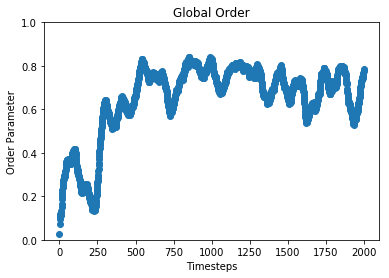

In [28]:
#Create a plot of global order over time

name = "%d_%d_%d.png" % (num_agents, board_size, iterations)
%matplotlib inline
x = [i for i in range(iterations)]
y = [df[2].iloc[i * num_agents] for i in range(iterations)]
plt.scatter(x, y)
plt.xlabel('Timesteps')
plt.ylabel('Order Parameter')
plt.title('Global Order')
#plt.savefig(name)
plt.ylim(0, 1) 


1933


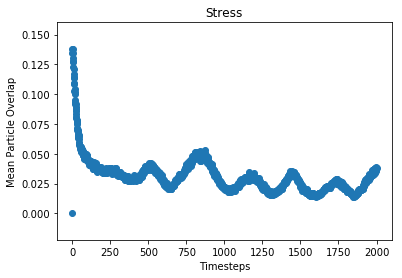

In [29]:
#Create a plot of system stress (mean particle overlap) over time

name = "%d_%d_%d.png" % (num_agents, board_size, iterations)
%matplotlib inline
x = [i for i in range(iterations)]
print(len(df[3].unique()))
y = [df[3].iloc[i * num_agents] for i in range(iterations)]
plt.scatter(x, y)
plt.title('Stress')
plt.xlabel('Timesteps')
plt.ylabel('Mean Particle Overlap')
#plt.ylim(0,1)
#plt.savefig(name) 

1983


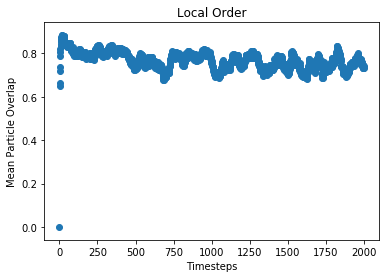

In [31]:
#Create a plot of local order over time (for use only with localorder.c)

name = "%d_%d_%d.png" % (num_agents, board_size, iterations)
%matplotlib inline
x = [i for i in range(iterations)]
print(len(df[4].unique()))
y = [df[4].iloc[i * num_agents] for i in range(iterations)]
plt.scatter(x, y)
plt.title('Local Order')
plt.xlabel('Timesteps')
plt.ylabel('Mean Particle Overlap')
#plt.ylim(0,1)
#plt.savefig(name) 

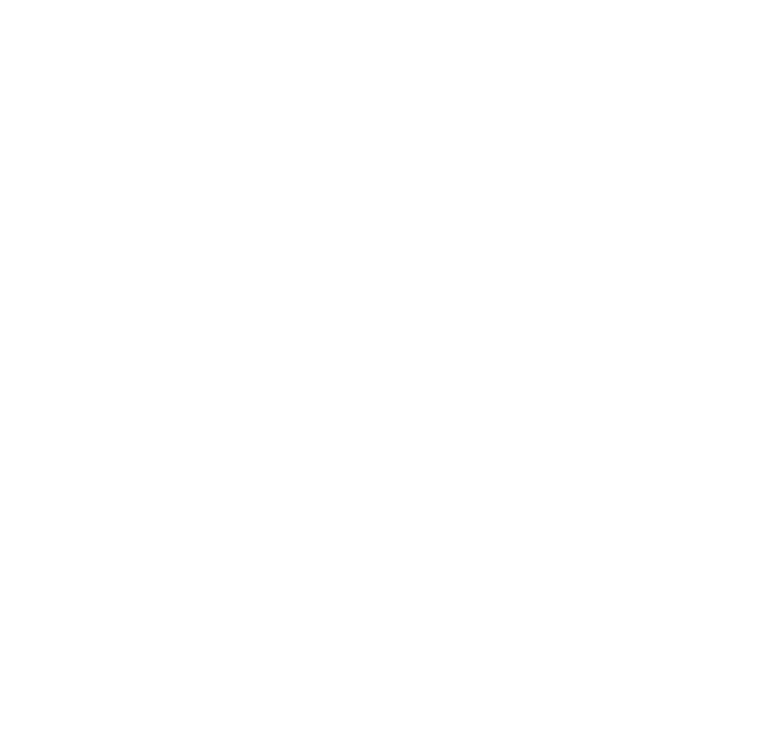

In [25]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=60, metadata=metadata)

fig = plt.figure(figsize=(10,10), frameon=False)
var = 2000 / board_size

ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

l, = plt.plot([], [],'k.', markersize=var, scalex=var, scaley=var)
plt.xlim(0, board_size)
plt.ylim(0, board_size)

x0, y0 = np.zeros((num_agents, 1)), np.zeros((num_agents, 1))

In [19]:
name = "%d_%d_%d.mp4" % (num_agents, board_size, iterations)
with writer.saving(fig, name, 200):
    for chunk in reader:
        #plt.quiver(chunk[0].values, chunk[1].values, chunk[2].values, chunk[3].values)
        x0 = chunk[0].values
        y0 = chunk[1].values
        l.set_data(x0, y0)
        writer.grab_frame()

$\sum_{n=1}^{\infty}$